<img title="GitHub Octocat" src='images/Octocat.jpg?raw=true' style='height: 60px; padding-right: 15px' alt="Octocat" align="left"> This notebook is part of a GitHub repository: https://github.com/pessini/SFI-Gender-in-Grants 
<br>MIT Licensed
<br>Author: Leandro Pessini

# <p style="background-color:#7ed2cc; font-family:tahoma; font-size:120%; text-align:left; color:#09436e; padding: 15px 5px 15px 25px; border-radius: 15px;">SFI - Gender differences in research grant applications</p>

# Gender Equality in Science Research Programmes in Ireland

<img src='images/gender_equality.jpeg' style='height:400px; border-radius: 15px'/>

# <p style="background-color:#7ed2cc; font-family:tahoma; font-size:120%; text-align:left; color:#09436e; padding: 15px 5px 15px 25px; border-radius: 15px;">Contents:</p>

* [1. Introduction](#1)
    * [1.1 Data Dictionary](#1.1)
    * [1.4 Notebook settings](#1.4)
    * [1.5 Libraries](#1.5)
    * [1.6 Loading Dataset](#1.6)
* [2. Data Cleaning & Wrangling](#2)
    * [2.1 Handle Missings](#2.1)
    * [2.2 Data Transformation / Aggregation](#2.2)
    * [2.3 European Regions](#2.3)
* [3. Exploratory Data Analysis](#3)
* [4. Dashboard](#4)
* [5. Conclusion](#5)
* [6. References](#6)

<a id="1"></a>
# <p style="background-color:#7ed2cc; font-family:tahoma; font-size:120%; text-align:left; color:#09436e; padding: 15px 5px 15px 25px; border-radius: 15px;">1- Introduction</p>

![Science Foundation Ireland (SFI)](images/sfi-logo.svg)
<br>

This analysis explore a dataset provided by [Ireland's Open Data Portal](https://data.gov.ie/) which helds public data from Irish Public Sectors such as Agriculture, Economy, Housing, Transportation etc.

[Science Foundation Ireland (SFI)](https://www.sfi.ie/) funds oriented basic and applied research in the areas of science, technology, engineering and mathematics.

The analysis is on __gender differences__ in research grants offered by SFI whether the award was accepted or declined by the applicant.

In [21]:
library(Hmisc)
library(psych, warn.conflicts = FALSE)
require(ggplot2)
require(scales)
require(dplyr)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:Hmisc’:

    src, summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [22]:
sfi.grants.gender <- read.csv('./data/SFIGenderDashboard_TableauPublic_2019.csv')

In [23]:
head(sfi.grants.gender)

,Programme.Name,Year,Award.Status,Applicant.Gender,Amount.Requested,Amount.funded
,<chr>,<int>,<chr>,<chr>,<int>,<int>
1,SFI Investigator Programme / Principal Investigator Programme,2016,Declined,Male,480000,NA
2,SFI Investigator Programme / Principal Investigator Programme,2014,Declined,Female,790000,NA
3,SFI Investigator Project Award,2012,Declined,Female,200000,NA
4,SFI Starting Investigator Research Grant,2018,Declined,Female,400000,NA
5,SFI Investigator Programme / Principal Investigator Programme,2013,Declined,Male,580000,NA
6,SFI Starting Investigator Research Grant,2015,Declined,Female,400000,NA


In [24]:
# Change the default plots size 
options(repr.plot.width=15, repr.plot.height=10)

In [25]:
# Data Exploration - Second Dataset (Grants by Gender)

sfi.grants.gender2 <- sfi.grants.gender
sfi.grants.gender2$Award.Status <- as.factor(sfi.grants.gender2$Award.Status)
sfi.grants.gender2$Applicant.Gender <- as.factor(sfi.grants.gender2$Applicant.Gender)

allMissing <- is.na(sfi.grants.gender2)
#get a count for each column
counts <- colSums(allMissing)

require(Hmisc)
require(psych, warn.conflicts = FALSE)

Hmisc::describe(sfi.grants.gender2)

sfi.grants.gender2 

 6  Variables      2778  Observations
--------------------------------------------------------------------------------
Programme.Name 
       n  missing distinct 
    2778        0       12 

lowest : SFI Career Development Award                                  SFI Future Research Leaders programme                         SFI Industry Fellowship                                       SFI Investigator Programme / Principal Investigator Programme SFI Investigator Project Award                               
highest: SFI Research Professorship                                    SFI Science Policy Research Programme                         SFI Spokes Fixed call Programme                               SFI Starting Investigator Research Grant                      SFI Technology Innovation Development Award                  
--------------------------------------------------------------------------------
Year 
       n  missing distinct     Info     Mean      Gmd 
    277

In [26]:
# By Gender
describeBy(sfi.grants.gender[,c("Amount.Requested", "Amount.funded")], sfi.grants.gender$Applicant.Gender)


 Descriptive statistics by group 
group: Female
                 vars   n     mean      sd median  trimmed    mad   min
Amount.Requested    1 719 614617.5 1677506  4e+05 392305.0 444780 10000
Amount.funded       2 213 546244.1 1824061  1e+05 279941.5  74130 10000
                      max    range  skew kurtosis       se
Amount.Requested 29870000 29860000 11.61   163.36  62560.4
Amount.funded    24250000 24240000 10.79   132.59 124982.6
------------------------------------------------------------ 
group: Male
                 vars    n    mean      sd median  trimmed    mad min      max
Amount.Requested    1 2000 1156305 3634810 430000 526062.5 489258   0 47940000
Amount.funded       2  592 1100039 3693443 310000 426940.9 340998   0 44440000
                    range skew kurtosis        se
Amount.Requested 47940000 7.20    58.48  81276.83
Amount.funded    44440000 7.04    56.67 151799.59

### As expected the number of Male Applicants is way higher than Female ones. But a interesting insight is that Male Applicants on average request almost the double amount for their grants than the Female Applicants.
#### Mean Amount Requested (Male) - 1.156.305,00 <BR> Mean Amount Requested (Female) - 614.617,50

`summarise()` regrouping output by 'Year' (override with `.groups` argument)



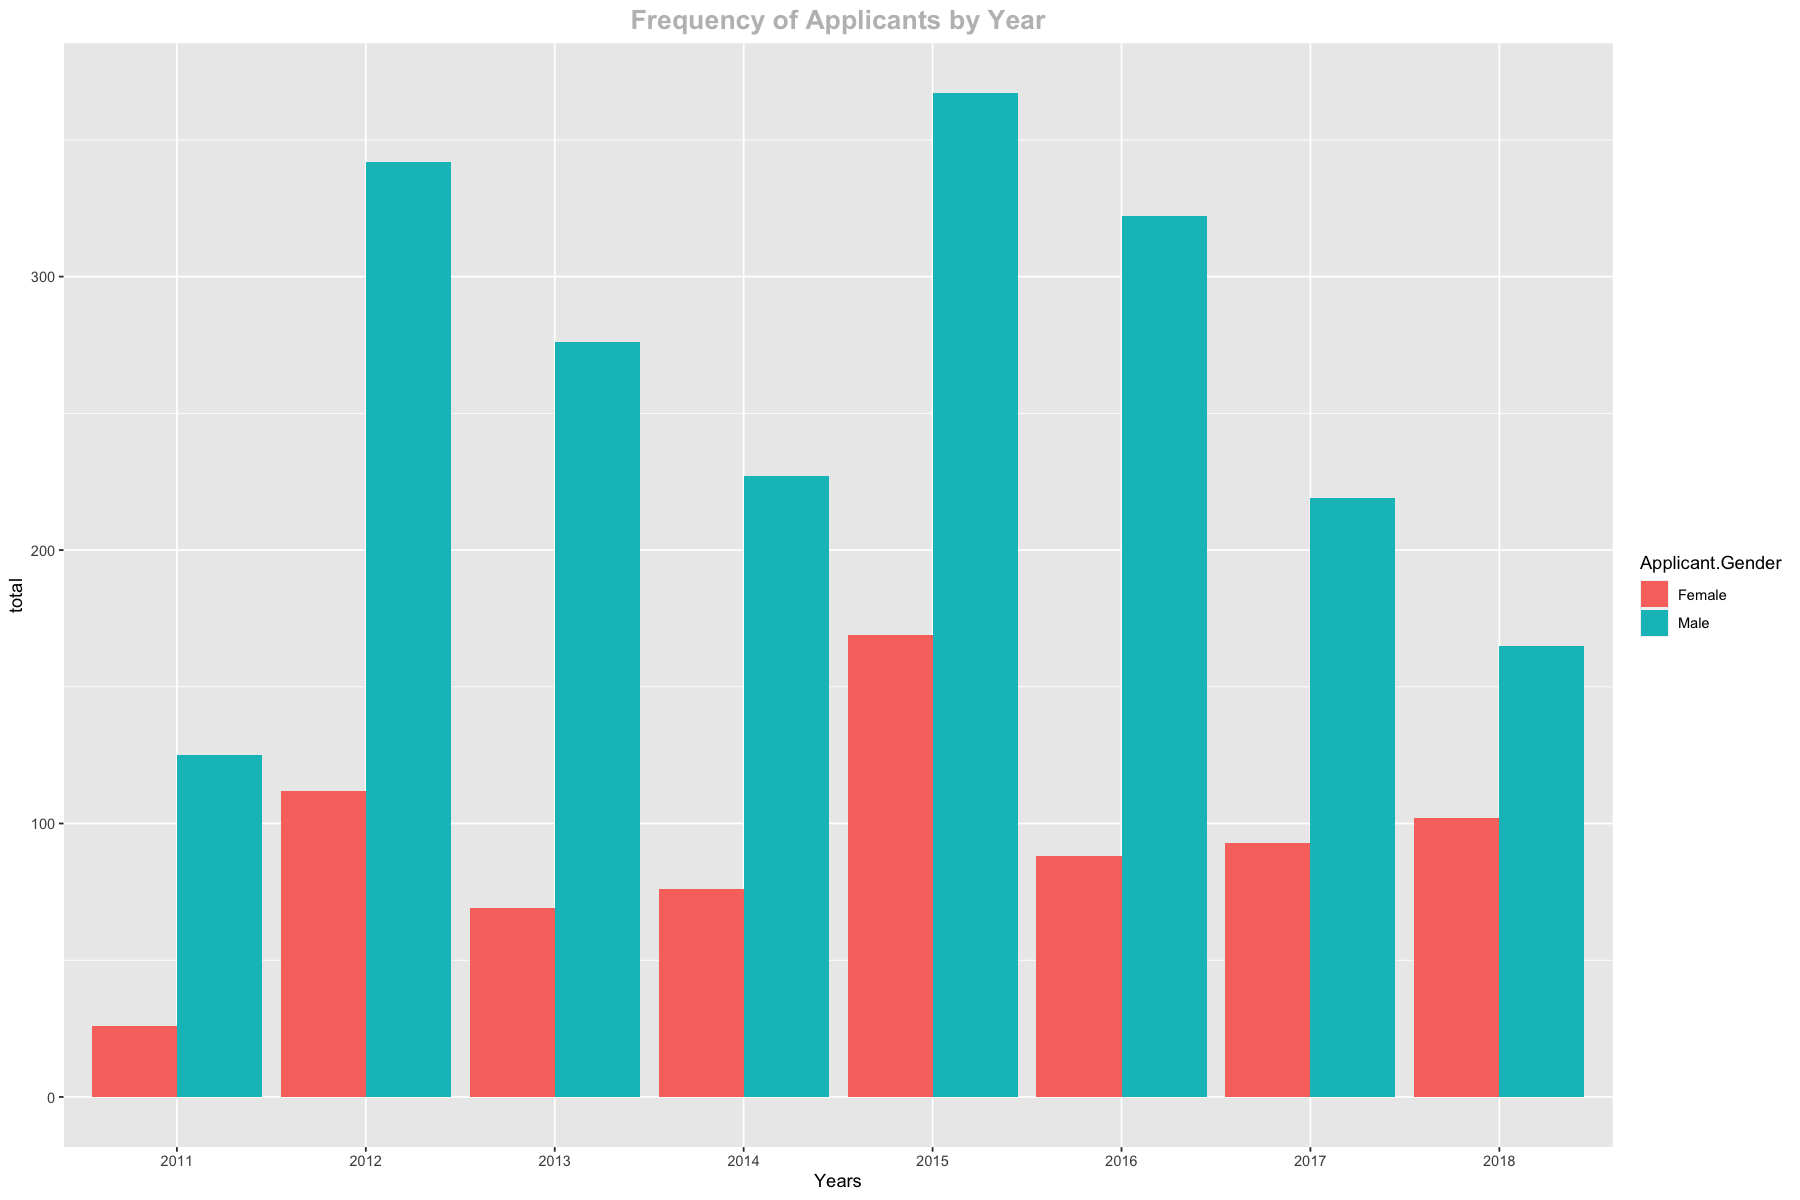

In [27]:
# How many applications were submitted each year by Gender?
total.by.year <- sfi.grants.gender2 %>% 
  group_by(Year, Applicant.Gender) %>% 
  summarise(total = n())

total.by.year %>% ggplot( aes(fill=Applicant.Gender, y=total, x=as.factor(Year))) + 
  geom_bar(stat="identity", position="dodge") +
  ggtitle("Frequency of Applicants by Year") +
  theme(plot.title = element_text(color = "grey", size = 16, face = "bold", hjust = 0.5)) +
  xlab("Years")

### After reached a peak in number of grants in 2015 we can see a decreasing in the coming years. <br> After a search online, on 2015, SFI made a report saying that a decline in the number of PhD graduates in STEM research has occurred which may lead to a skills deficit in future years. (https://www.sfi.ie/research-news/publications/annual-reports/Annual-report-2015.pdf)

### The data shows us that the prediction has happened indeed.

In [28]:
# Proportion of accepted and denied applications by gender
require(gmodels)
CrossTable(sfi.grants.gender2$Applicant.Gender, sfi.grants.gender2$Award.Status,
          prop.r=TRUE,
          prop.c=FALSE,
          prop.t=FALSE,
          prop.chisq=FALSE,
          digits=2)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  2778 

 
                                    | sfi.grants.gender2$Award.Status 
sfi.grants.gender2$Applicant.Gender |   Awarded |  Declined | Row Total | 
------------------------------------|-----------|-----------|-----------|
                             Female |       214 |       521 |       735 | 
                                    |      0.29 |      0.71 |      0.26 | 
------------------------------------|-----------|-----------|-----------|
                               Male |       590 |      1453 |      2043 | 
                                    |      0.29 |      0.71 |      0.74 | 
------------------------------------|-----------|-----------|-----------|
                       Column Total |       804 |      1974 |      2778 | 
------------------------------------|-----------|-----------|-----------|

 


### The proportion of Awarded/Declined Grants is the same for both genders. <Br> 29% Awarded | 71% Declined

In [29]:
# Chi-squared test for variables Gender and Award Status
status.gender.table <- table(sfi.grants.gender2$Applicant.Gender, sfi.grants.gender2$Award.Status)
chisq.test(status.gender.table)


	Pearson's Chi-squared test with Yates' continuity correction

data:  status.gender.table
X-squared = 0.0054536, df = 1, p-value = 0.9411


### After applying the Chi-squared test we can conclude that probably the two variables (Gender and Award Status) are independents of each other, therefore, there is no relationship between them.

In [30]:
# By Award Status
describeBy(sfi.grants.gender[,c("Amount.Requested", "Amount.funded")], sfi.grants.gender$Award.Status)


 Descriptive statistics by group 
group: Awarded
                 vars   n      mean      sd median  trimmed    mad   min
Amount.Requested    1 804 1024701.5 3616477 265000 405993.8 289107 10000
Amount.funded       2 801  954360.8 3319078 240000 383666.2 266868  3000
                      max    range skew kurtosis       se
Amount.Requested 47940000 47930000 7.78    68.92 127543.3
Amount.funded    44440000 44437000 7.73    68.96 117273.9
------------------------------------------------------------ 
group: Declined
                 vars    n    mean      sd median  trimmed    mad min      max
Amount.Requested    1 1915 1008178 3073772 440000 521161.1 504084   0 45380000
Amount.funded       2    4  782500  895484 655000 782500.0 919212   0  1820000
                    range skew kurtosis        se
Amount.Requested 45380000 7.98    72.19  70240.45
Amount.funded     1820000 0.13    -2.29 447742.02

### Analysing the statistics resulted from the Amount Requested and Funded by Award status we can see that the average difference between Requested and Funded in Grants Awarded is not high. <BR> Mean Requested - 1.024.701,5 and Mean Funded 954.360,8

In [31]:
# Relationship between Amount Requested x Status (Awarded/Declined)

amount.requested.clean <- filter(sfi.grants.gender2, !is.na(Amount.Requested))

# Creating a category based on quantile to categorize the Amount Requested
total.amount.requested <- amount.requested.clean %>%
  mutate(Category.Amount=cut(Amount.Requested, 
                             breaks=quantile(Amount.Requested, c(0,.25,.50,.75,1), na.rm = TRUE), 
                             labels=c("low","medium","high","very-high")))

total.amount.requested %>% group_by(Category.Amount) %>% summarise(total= n()) %>% ungroup()

`summarise()` ungrouping output (override with `.groups` argument)



Category.Amount,total
<fct>,<int>
low,799
medium,625
high,618
very-high,674
NA,3


In [32]:
CrossTable(total.amount.requested$Award.Status, total.amount.requested$Category.Amount,
          prop.r=TRUE,
          prop.c=FALSE,
          prop.t=FALSE,
          prop.chisq=FALSE,
          digits=2)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  2716 

 
                                    | total.amount.requested$Category.Amount 
total.amount.requested$Award.Status |       low |    medium |      high | very-high | Row Total | 
------------------------------------|-----------|-----------|-----------|-----------|-----------|
                            Awarded |       364 |       133 |       121 |       186 |       804 | 
                                    |      0.45 |      0.17 |      0.15 |      0.23 |      0.30 | 
------------------------------------|-----------|-----------|-----------|-----------|-----------|
                           Declined |       435 |       492 |       497 |       488 |      1912 | 
                                    |      0.23 |      0.26 |      0.26 |      0.26 |      0.70 | 
------------------------------------|-----------|--------

### 45% of the Applicants who have their requested Grants Awarded have applied for a "Low" amount.
### Below there is a graph which represents the total of awarded/declined by categories

`summarise()` regrouping output by 'Category.Amount' (override with `.groups` argument)



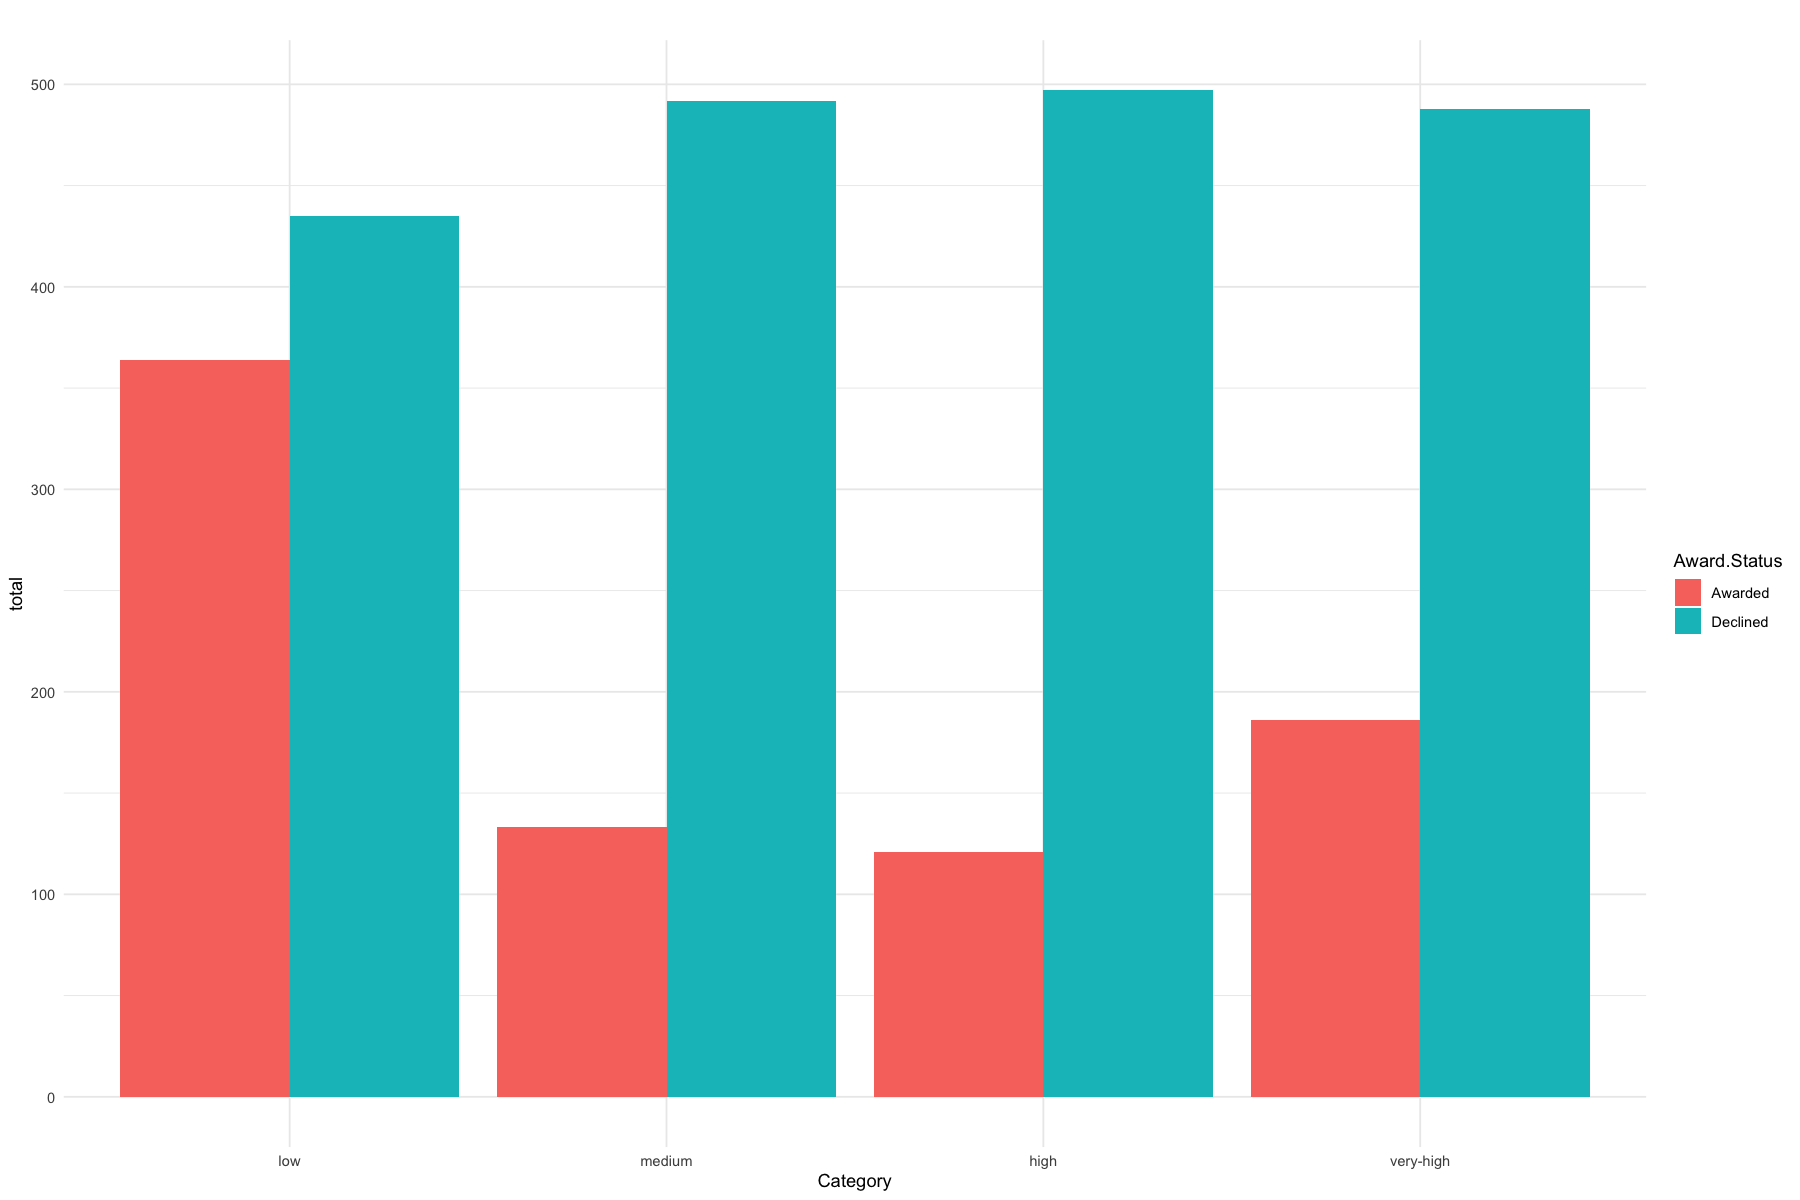

In [33]:
# Plot the total of awarded/declined by categories
categories.amount <- total.amount.requested %>%
  group_by(Category.Amount, Award.Status) %>%
  filter(!is.na(Category.Amount)) %>%
  summarise(total = n())

categories.amount %>% ggplot( aes(fill=Award.Status, y=total, x=as.factor(Category.Amount))) + 
  geom_bar(position="dodge", stat="identity") +
  ggtitle("") +
  theme_minimal() +
  theme(plot.title = element_text(color = "grey", size = 14, face = "bold", hjust = 0.5)) +
  xlab("Category")

<a id="4"></a>
# <p style="background-color:#7ed2cc; font-family:tahoma; font-size:120%; text-align:left; color:#09436e; padding: 15px 5px 15px 25px; border-radius: 15px;">4- Dashboard</p>

![Tableau](images/tableau-logo.png)
<br><br>

This Dashboard was created using Tableau® software.

The __focus__ is to show the main insights found on this analysis. The Dashboard along with the Data Exploration can be found on [Tableau website](https://public.tableau.com/profile/leandro.pessini#!/vizhome/ScienceFoundationIrelandSFI-Gender/Awards-Gender).

![SFI - Gender Dashboard](images/gender-dashboard.png)

<a id="5"></a>
# <p style="background-color:#7ed2cc; font-family:tahoma; font-size:120%; text-align:left; color:#09436e; padding: 15px 5px 15px 25px; border-radius: 15px;">5- Conclusion</p>

<a id="6"></a>
# <p style="background-color:#7ed2cc; font-family:tahoma; font-size:120%; text-align:left; color:#09436e; padding: 15px 5px 15px 25px; border-radius: 15px;">6- References</p>

>Data.gov.ie. (n.d.). Retrieved from https://data.gov.ie/

<img title="GitHub Mark" src="images/GitHub-Mark-64px.png?raw=true" style="height: 32px; padding-right: 15px" alt="GitHub Mark" align="left"> [GitHub repository](https://github.com/pessini/SFI-Awards-Distribution) <br>Author: Leandro Pessini

In [1]:
R.version$version.string

[1] "R version 4.0.2 (2020-06-22)"